In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.special import jv
from scipy.special import yv
from scipy.optimize import root

In [3]:
Q = 150  # m/s^3
A = 2000 # m^2
k = 400
kappa = 400
R = 10000
L = 10000

D = 1

pi = np.pi

a = A/(pi*D)

In [5]:
print(a/(R-a))
print(Q/(kappa*pi*D))

print(Q*L/(k*A))

0.06799037921036709
0.1193662073189215
1.875


### Finding eigenfunctions and -values

In [4]:
order = Q/(2*kappa*pi*D)

def phi_r(r,par):
    return (r)**(order)*jv(order, np.sqrt(par[0]/kappa)*(r)) + par[2]*(r)**(order)*yv(order, np.sqrt(par[0]/kappa)*(r))

def phi_x(x,par):
    return np.exp(-Q/(2*k*A)) * (par[1]*np.sin(np.sqrt(4*k*par[0] -(Q/A)**2)/(2*k)* x ) + par[3]*np.cos(np.sqrt(4*k*par[0] -(Q/A)**2)/(2*k)* x ))

# def phi_x(x,par):
#     return np.exp(-Q/(2*k*A)) * (par[1]*np.exp(np.sqrt(-4*k*par[0] +(Q/A)**2)/(2*k)* x ) + par[3]*np.exp(-np.sqrt(-4*k*par[0] +(Q/A)**2)/(2*k)* x ))


def phi_x_prime(x,par):
    a = -Q/(2*k*A)
    w = np.sqrt(4*k*par[0] - (Q/A)**2)/(2*k)
    return np.exp(a*x)*(np.sin(w*x)*(a*par[1]-par[3]*w) + np.cos(w*x)*(w*par[1] + par[3]*a)) 

# def phi_x_prime(x,par):
#     a = -Q/(2*k*A)
#     w = np.sqrt(-4*k*par[0] + (Q/A)**2)/(2*k)
#     return np.exp(a*x)*(np.exp(w*x)*(a*par[1]+par[1]*w) + np.exp(-w*x)*(-w*par[3] + par[3]*a)) 

def phi_r_prime(r,par):
    c = order
    w = np.sqrt(par[0]/kappa)
    d = par[2]
    
    T1 = d*w*r*yv(c-1, w*r)
    T2 = 2*c*d*yv(c, w*r)
    T3 = -d*w*r*yv(c+1,w*r)
    T4 = w*r*jv(c-1,w*r)
    T5 = 2*c*jv(c,w*r)
    T6 = -w*r*jv(c+1,w*r)
    return 0.5*r**(c-1)*(T1+T2+T3+T4+T5+T6)

In [5]:
phi_bc1 = lambda par: phi_r(a,par) - phi_x(0,par)
phi_bc2 = lambda par: phi_r(R,par)
phi_bc3 = lambda par: phi_x(L,par)
phi_bc4 = lambda par: k*phi_x_prime(0,par) + kappa*phi_r_prime(a,par)

def func_r(par):
    return phi_bc1(par), phi_bc2(par), phi_bc3(par), phi_bc4(par)


# def is_new(r,roots):
#     temp = True
#     for j in range(len(roots)):
#         if ( abs(r[0]-roots[j][0])<0.01*abs(r[0]) ) and ( abs(r[1]-roots[j][1])<0.01*abs(r[1]) ):
#             temp = False
#     return temp

# roots_r = []
# for i in np.linspace(0.0012,0.0017,10):
#     for j in np.linspace(-10,10,4):
#         for p in np.linspace(-10,10,4):
#             for q in np.linspace(-10,10,4):
#                 rt = root(func_r, x0 =(i,j,p,q)).x
#                 if is_new(rt,roots_r):
#                     roots_r.append(rt)
#                     #print(rt)

# r = np.linspace(a,R,500)
# x = np.linspace(0,L,500)
# i = 0
# for rt in roots_r:
#     print(rt)
#     plt.figure()
#     plt.title(str(i)+str(rt))
#     plt.plot(r, phi_r(r,rt))
#     plt.plot(-x, phi_x(x,rt))
#     plt.hlines(0,-L,R)
#     plt.show()
#     i+=1
    

In [13]:
x = np.linspace(0,L,250)
r = np.linspace(a,R,250)
def n_roots(rt):
    temp = 0
    if abs(phi_x(0,rt) -  phi_r(a,rt))>0.1: return -1
    elif abs(phi_x(L,rt))>0.1: return -1
    elif abs(phi_r(R,rt))>0.1: return -1
    for j in range(1,len(x)-2):
        if phi_x(x[j],rt)*phi_x(x[j-1],rt)<0:
            temp+=1
    for j in range(1,len(r)-2):
        if phi_r(r[j],rt)*phi_r(r[j-1],rt)<0:
            temp+=1
    return temp

Nmax = 75

roots = [[0,0,0,0] for i in range(Nmax)]

for i in np.linspace(1e-5,1e-3,100):
#     print(i)
    for j in np.linspace(-10,10,4):
        for p in np.linspace(-10,10,4):
            for q in np.linspace(-10,10,4):
                rt = root(func_r, x0 =(i,j,p,q)).x
                N = n_roots(rt)
                if N<Nmax:
                    if N+1>0 and roots[N][0] == 0:
                        roots[N] = rt
                        print(N)

for i in np.linspace(1e-3,0.06,100):
#     print(i)
    for j in np.linspace(-5,5,3):
        for p in np.linspace(-5,5,3):
            for q in np.linspace(-5,5,3):
                rt = root(func_r, x0 =(i,j,p,q)).x
                N = n_roots(rt)
                if N<Nmax:
                    if N+1>0 and roots[N][0] == 0:
                        roots[N] = rt
                        print(N)
                        
                        #print(rt)
for i in range(len(roots)):
    print(roots[i])

0
1


<ipython-input-4-fef775539ff5>:4: RuntimeWarning: invalid value encountered in sqrt
  return (r)**(order)*jv(order, np.sqrt(par[0]/kappa)*(r)) + par[2]*(r)**(order)*yv(order, np.sqrt(par[0]/kappa)*(r))
<ipython-input-4-fef775539ff5>:7: RuntimeWarning: invalid value encountered in sqrt
  return np.exp(-Q/(2*k*A)) * (par[1]*np.sin(np.sqrt(4*k*par[0] -(Q/A)**2)/(2*k)* x ) + par[3]*np.cos(np.sqrt(4*k*par[0] -(Q/A)**2)/(2*k)* x ))
<ipython-input-4-fef775539ff5>:15: RuntimeWarning: invalid value encountered in sqrt
  w = np.sqrt(4*k*par[0] - (Q/A)**2)/(2*k)
<ipython-input-4-fef775539ff5>:25: RuntimeWarning: invalid value encountered in sqrt
  w = np.sqrt(par[0]/kappa)


2
3
4
5
7
6
8
9
10
11
14
12
13
15
16
17
18
22
19
20
21
23
24
25
27
35
26
28
29
30
31
32
33
34
37
36
39
38
40
41
42
43
44
45
47
46
48
49
50
53
51
52
54
55
56
57
65
59
58
60
66
63
61
62
64
68
67
72
69
70
71
74
73
[ 2.11361167e-05  9.93918054e-01 -2.03907245e-01  1.70398600e+00]
[ 4.17398088e-05 -4.85507622e+00  9.20006757e-01 -2.44451389e-01]
[ 1.12702639e-04  9.58970264e-01 -3.16237581e-01  1.70543037e+00]
[ 1.65868791e-04 -2.77884855e+00  1.09136059e+00  2.44356333e-01]
[ 2.84128647e-04  8.85888332e-01 -3.30933496e-01  1.54089605e+00]
[ 3.76027234e-04 -2.31582449e+00  1.39820693e+00  5.31258627e-01]
[ 5.37517029e-04  8.46164531e-01 -3.01797356e-01  1.35367772e+00]
[ 6.71698080e-04 -2.24051561e+00  1.84612560e+00  8.38842809e-01]
[ 8.73678771e-04  8.25304502e-01 -2.50664650e-01  1.17557242e+00]
[ 1.05256539e-03 -2.41744226e+00  2.55500798e+00  1.27875907e+00]
[ 0.00129305  0.81364267 -0.18738312  1.01381536]
[ 1.51838521e-03 -2.97078598e+00  3.88730054e+00  2.08123673e+00]
[ 0.00179594 

In [14]:
np.savetxt('roots.csv', roots)

n= 0


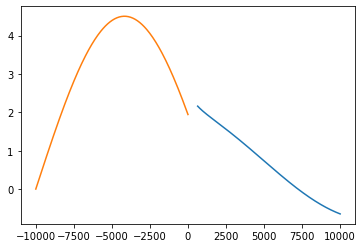

n= 1


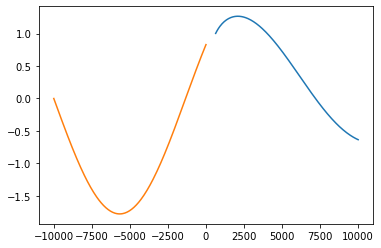

n= 2


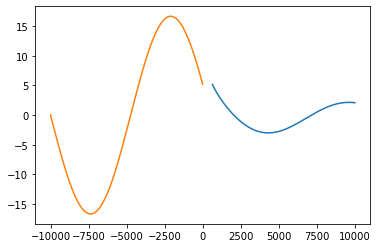

n= 3


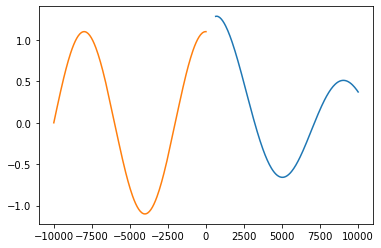

n= 4


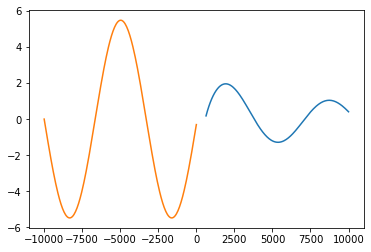

n= 5


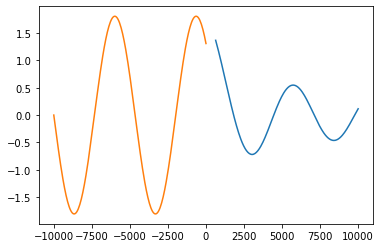

n= 6


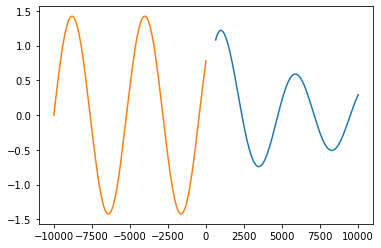

n= 7


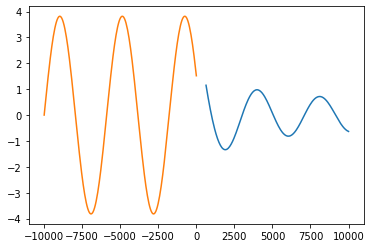

n= 8


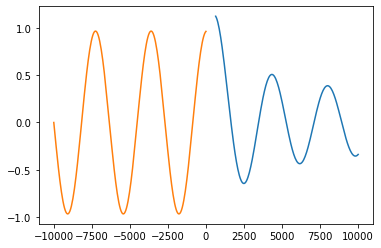

n= 9


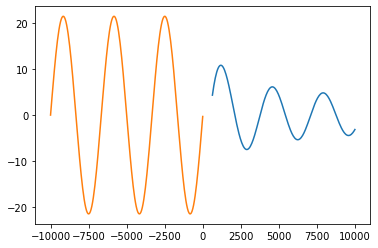

n= 10


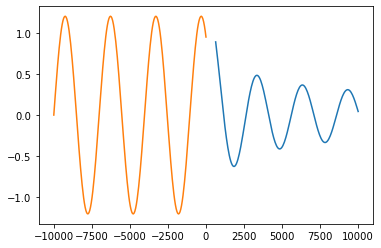

n= 11


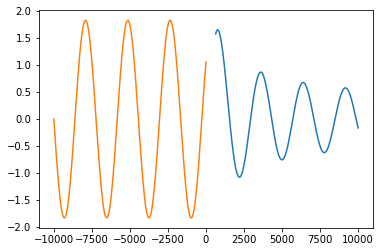

n= 12


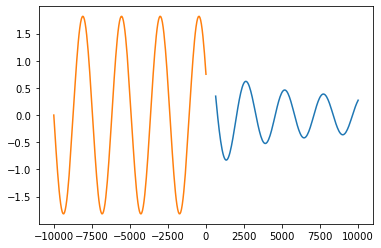

n= 13


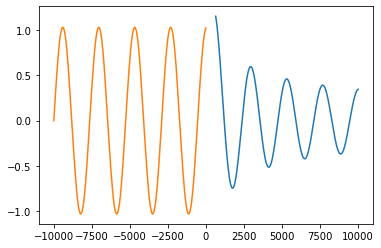

n= 14


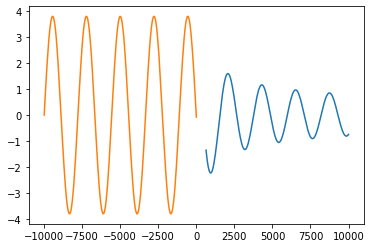

n= 15


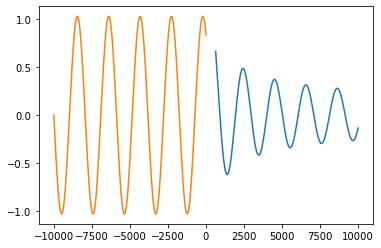

n= 16


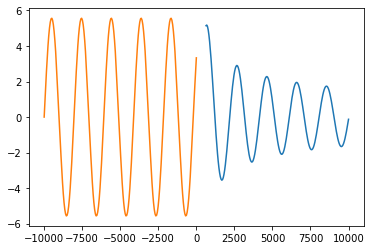

In [10]:

good_roots = np.array([[3.25791768e-05, 4.06467532e+00, -4.72749879e-01, 1.94375538e+00], #n=0
                      [5.61441414e-05, -1.57234660e+00, 2.04451650e-01, 8.29972159e-01], #n=1
                      [1.45935924e-04,1.58585906e+01,-3.63076969e+00,5.18833503e+00], #n=2
                      [2.51315968e-04,1.85613747e-02,3.83349975e-02,1.10106552e+00], #n=3
                      [3.54633002e-04,-5.46681567e+00,1.93997243e+00,-3.04898173e-01], #n=4
                      [5.56400589e-04,1.24640388e+00,-3.78018269e-01,1.30828925e+00], #n=5
                      [6.94814375e-04,-1.18871587e+00,7.13740976e-01,7.78655817e-01], #n=6
                      [9.39714773e-04,3.50340599e+00,-1.56150240e+00,1.51968105e+00], #n=7
                      [0.00118613,-0.0814833,0.35194703,0.9654707], # n=8
                      [1.42259592e-03,-2.15540814e+01,1.36983283e+01,-3.06408083e-01], #n=9
                      [0.00178115,0.74229589,-0.05655948,0.95510943], #n=10
                      [0.0020476,-1.49598846,1.63268582,1.05596767], #n=11
                      [0.00244525,1.65553452,-0.7369691,0.75081298], #n=12
                      [0.00283119,-0.11893581,0.83301684,1.02428133], #n=13
                      [3.20578297e-03,3.79518454e+00,-2.91930128e+00,-7.57465604e-02], #n=14
                      [0.0037177,0.60415853,0.30802913,0.83396601], #n=15
                      [4.11441077e-03,-4.45674408e+00,6.58559297e+00,3.33354001e+00]]) #n=16

n=0
for rt in good_roots:
    print('n=',n)
    plt.figure()
    plt.plot(r, phi_r(r,rt))
    plt.plot(-x, phi_x(x,rt))
    plt.show()
    n+=1

In [61]:
from scipy import integrate

def phi_r_n(r,n):
    return phi_r(r, roots[n])

def labda_n(n):
    return good_roots[n][0]

def phi_x_n(x,n):
    return phi_x(x,roots[n])

def inner(n,m):
    return integrate.quad(lambda x: phi_x_n(x,m)*phi_x_n(x,n), 0, L)[0] + integrate.quad(lambda r: phi_r_n(r,m)*phi_r_n(r,n), a, R)[0]

gamma = 1/(kappa*L/k + R-a)
alpha = -kappa/k*gamma
def psi_x(x):
    return alpha*(x-L)
def psi_r(r):
    return gamma*(r-R) +1

N = 50
G = np.array([[inner(n,m) for n in range(N)] for m in range(N)])

inv = np.linalg.inv(G)

coeff = np.array([sum([inv[n,j]*(integrate.quad(lambda x: psi_x(x)*phi_x_n(x,j), 0, L)[0] + integrate.quad(lambda r: psi_r(r)*phi_r_n(r,j), a, R)[0]) for j in range(N)]) for n in range(N)])

print(a)

636.6197723675814


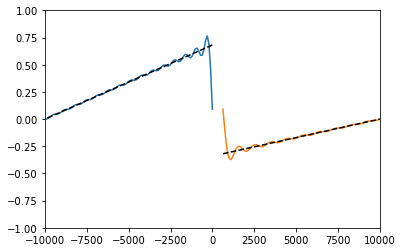

In [63]:
def approx(x):
    return np.sum(coeff * np.array([phi_x_n(x,n) for n in range(N)]))

def appror(r):
    return np.sum(coeff * np.array([phi_r_n(r,n) for n in range(N)]))

x = np.linspace(0,L,100)
r = np.linspace(a,R,100)

resx = np.array([approx(j) for j in x])
resr = np.array([appror(j) for j in r])

plt.figure()
plt.plot(-x, resx, 'C0-')
plt.plot(-x, psi_x(x), 'k--')
plt.plot(r, resr, 'C1-')
plt.plot(r, psi_r(r), 'k--')
plt.ylim(0,1)
plt.xlim(-L,R)
plt.show()